# Linear Regression Analysis of Player Performances Over the Age of 30

## Step 1: Import Libraries

In [2]:
#Import Library 
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from nba_api.stats.endpoints import playercareerstats
from matplotlib import pyplot as plt

## Step 2: Create Variables and Dataframes from NBA API 

In [31]:
# Here we access the Player Career Stats module through endpoints.
# This module holds all statistics on former and current players based on totals and per game averages.
# We will select 6 athletes over the age of 30 that are currently playing.

demar_log = playercareerstats.PlayerCareerStats(per_mode36='PerGame', player_id = '201942') #DeMar Derozan

cp3_log = playercareerstats.PlayerCareerStats(per_mode36='PerGame', player_id='101108') #Chris Paul

harden_log = playercareerstats.PlayerCareerStats(player_id='201935', per_mode36='PerGame') #James Harden

russ_log = playercareerstats.PlayerCareerStats(player_id='201566', per_mode36='PerGame') #Russell Westbrook

dame_log = playercareerstats.PlayerCareerStats(player_id='203081', per_mode36='PerGame') #Dame Lillard

bron_log = playercareerstats.PlayerCareerStats(player_id='2544', per_mode36='PerGame') #LeBron James

# After creating the variables above to select our athletes, we create 6 more variables that will command Python to pull
# information on ONLY their regular season averages for every season of each athlete with the "get_data_frames() command"

df_demar=demar_log.get_data_frames()[0]

df_cp3=cp3_log.get_data_frames()[0]

df_harden=harden_log.get_data_frames()[0]

df_russ=russ_log.get_data_frames()[0]

df_dame=dame_log.get_data_frames()[0]

df_bron=bron_log.get_data_frames()[0]

#print()


## Step 3: Define Variables for Linear Model

In [33]:
# Our linear regression will look at each athlete individually. Meaning we will be looking at each dataframe individually
# and not a cluster of dataframes in our regression. We must make sure that the correct dataframe for the player we
# want to observe is being used for each x and y variable within the regression.
# We examine FTA (x) to two different y variables (ppg and fgpct) to compare the relationship our x may have with a given y.
x, y = df_russ.FTA, df_russ.PTS

x = np.array(x).reshape(-1,1)     # we reshape our array from 1d to 2d. 
y = np.array(y).reshape(-1,1)     # The proper shaped array is an input requirement for the linear model
                                  # reshaping is usually an issue when using 1 x variable

## Step 4: Establish Model Type and Measure of Accuracy

In [34]:
model = linear_model.LinearRegression()    # create an object that contains the linear model class
model.fit(x,y)                             # Fit our modeling using FTA (x) and PPG/FGPCT(y)

r2 = round(model.score(x,y), 2)            # Get our r2 value and round it to 2 decimals. 
predicted_y = model.predict(x)             # Get our predicted y values for x

## Step 5: Visualize our Results

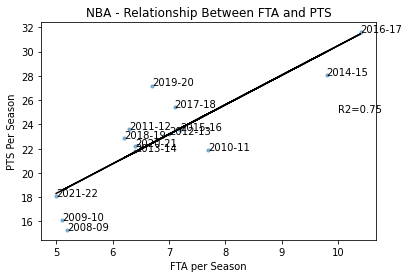

In [36]:
# Finally we use matplotlib to visualize our data model.The visual should include a scatter plot with a line 
# of best fit that helps to explain the relationship between our x and y variable.
# Positive relationship will see the line trend upward.
# Negative relationship will see the line trend downward.
# Our visualization of this model should give us valuable information on performance of each player over the course of their
# carreer in relation to the chosen x and y variables.

annotations=df_russ.SEASON_ID                            #define a variable to help us label the dots by yearly season 
                                                         #be sure to change to dataframe for the right player.
    
plt.scatter(x, y, s=10, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FTA and PTS')          # Give it a title
plt.xlabel('FTA per Season')                                   # Label x-axis
plt.ylabel('PTS Per Season')                                # Label y-axis
plt.text(10,25, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly
for i, label in enumerate(annotations):                 #for label produces the season to the correspong plot point
    plt.annotate(label, (x[i], y[i]))

# We save the image as 'player_name graph.png'. Each Player will have two graphs. The second graph will end in 'graph2.png'
# for the fgpct.
# We'll set the dpi (dots per inch) to 300, so we have a nice looking picture.
plt.savefig('Russ graph.png', dpi=300) 